In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# CLR Callback

In [2]:
from clr_scheduler import *

## Test Set

In [3]:
from fastai.basics import *

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(15, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        y_pred = torch.sigmoid(self.fc2(x))
        return y_pred.squeeze()

In [5]:
train_x = torch.rand(2000000, 15)
valid_x = torch.rand(2000000, 15)

In [6]:
train_y = torch.randint(0,2, (2000000,)).float()
valid_y = torch.randint(0,2, (2000000,)).float()

In [7]:
model = Net()

In [8]:
class ArrayDataset(Dataset):
    "Sample numpy array dataset"
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = 2 # binary label
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [9]:
train_ds, valid_ds = ArrayDataset(train_x, train_y), ArrayDataset(valid_x, valid_y)

In [10]:
data = DataBunch.create(train_ds, valid_ds, bs=2000, num_workers=1)

In [11]:
criterion = nn.BCELoss()

In [13]:
learn = Learner(data, model, loss_func=criterion)

## Callback test

In [13]:
lr = 0.001
learn.callbacks.append(CircularLRScheduler(learn, mode='triangular', base_lr=lr, max_lr=0.003, step_size=2000))

In [ ]:
learn.fit(10)

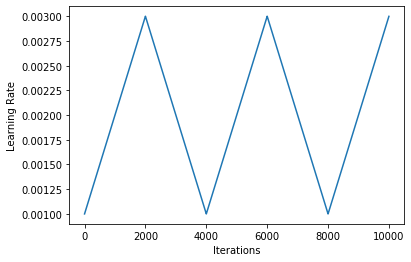

In [15]:
learn.recorder.plot_lr()

In [14]:
learn.callbacks = []
learn.callbacks.append(CircularLRScheduler(learn, mode='triangular2', base_lr=0.001, max_lr=0.003, step_size=2000))

learn.fit(20)

epoch,train_loss,valid_loss,time
0,0.693232,0.693222,01:36
1,0.693181,0.693235,01:34
2,0.693183,0.693167,01:32
3,0.693175,0.693163,01:36
4,0.693152,0.693152,01:33
5,0.693181,0.693235,01:32
6,0.693156,0.693196,01:32
7,0.693163,0.693150,01:33
8,0.693155,0.693147,01:32
9,0.693159,0.693147,01:32


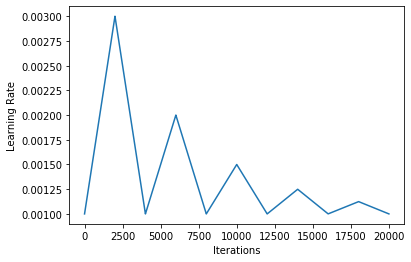

In [15]:
learn.recorder.plot_lr()

In [ ]:
learn.callbacks = []
learn.callbacks.append(CircularLRScheduler(learn, mode='exp_range', base_lr=0.001, max_lr=0.003, step_size=2000, gamma=0.99994))

learn.fit(20)

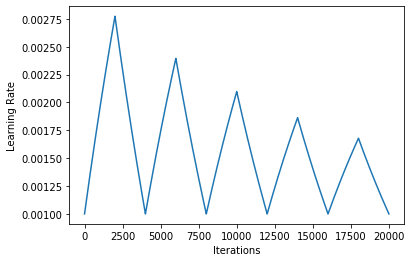

In [19]:
learn.recorder.plot_lr()

In [19]:
clr_fn = lambda x: 1/(5**(x*0.0001))
clr = CircularLRScheduler(learn,base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='iterations')
learn.callbacks = []                    
learn.fit(10, callbacks=[clr])

epoch,train_loss,valid_loss,time
0,0.693166,0.693149,01:30
1,0.693159,0.693147,01:28
2,0.693155,0.693147,01:31
3,0.693152,0.693147,01:33
4,0.693154,0.693149,01:29
5,0.693159,0.693149,01:31
6,0.693155,0.693148,01:33
7,0.693150,0.693147,01:30
8,0.693149,0.693150,01:33
9,0.693159,0.693147,01:33


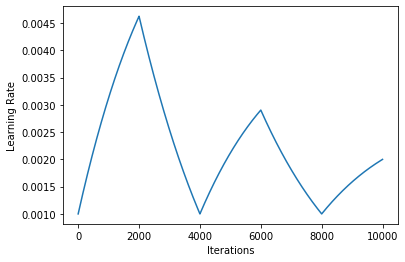

In [20]:
learn.recorder.plot_lr()